# Entregável 1 - visão computacional

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 3.1.0 


# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

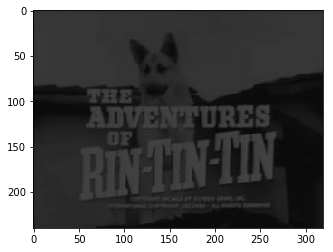

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

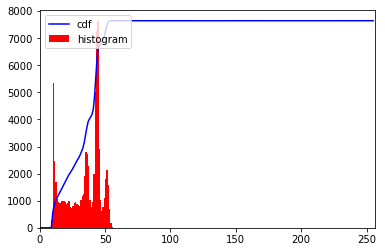

In [8]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

O histograma fornecido não aproveita bem as faixas de cores, visto que, em "gray scale", a imagem não possui pixels com valores acima de 60. Lembrando que quanto menor o valor do pixel, mais preto ele é e quanto maior, mais branco ele é, ou seja, a imagem é escura.

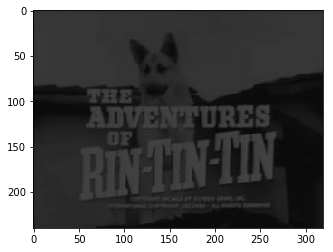

In [9]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

### Nova Imagem Rintin

In [25]:
for i in range (len(rintin_gray)):
    for j in range(len(rintin_gray[i])):
        rintin_gray[i][j]= rintin_gray[i][j]*5.1 - 40.8


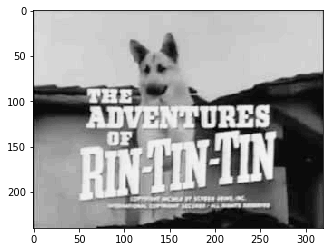

In [26]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

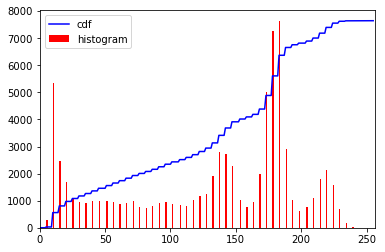

In [27]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [29]:
imagem = cv2.imread("imagem.jpg")
img = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

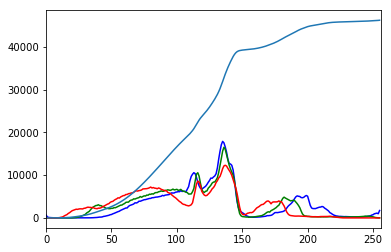

In [30]:
color = ['b','g','r']
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized)
plt.show()
    
    



#### Com o histograma não é possível identificar a caixa vermelha pois, mesmo com as faixas bem definidas no gráfico, existem outros tons que possuem o vermelho como, por exemplo, a parede branca no fundo da imagem.

In [31]:
img = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

In [32]:
for i in range (len(img)):
    for j in range (len(img[i])):
        if img[i][j][0] > 161 and img[i][j][1]<145 and img[i][j][2]<145:
            img[i][j][0]=255
            img[i][j][1]=255
            img[i][j][2]=255
        else:
            img[i][j][0]=0
            img[i][j][1]=0
            img[i][j][2]=0


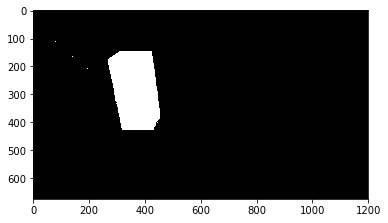

In [33]:
plt.imshow(img)